* Visualizing Train & Predict with data whose dimensionality > 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Load data and Train

In [151]:
n_features = 6
data = make_classification(n_features = n_features, n_redundant=2, n_informative = n_features-2, n_samples=1000, random_state= 1, n_clusters_per_class=1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = .2, random_state=42,)

In [153]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision score:', precision_score(y_test, pred_lr))
print('Recall score:', recall_score(y_test, pred_lr))
print('F1 score:', f1_score(y_test, pred_lr))
print('AUC:', roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1] ))

Accuracy: 0.98
Precision score: 0.9795918367346939
Recall score: 0.9795918367346939
F1 score: 0.9795918367346939
AUC: 0.9855942376950779


In [155]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

print('Accuracy:', model_rf.score(X_test, y_test))
print('Precision score:', precision_score(y_test, pred_rf))
print('Recall score:', recall_score(y_test, pred_rf))
print('F1 score:', f1_score(y_test, pred_rf))
print('AUC:', roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1] ))

Accuracy: 0.98
Precision score: 0.9795918367346939
Recall score: 0.9795918367346939
F1 score: 0.9795918367346939
AUC: 0.9839935974389755


In [156]:
model_sv = SVC(kernel='rbf', probability=True,random_state=42)
model_sv.fit(X_train, y_train)
pred_sv = model_sv.predict(X_test)

print('Accuracy:', model_sv.score(X_test, y_test))
print('Precision score:', precision_score(y_test, pred_sv))
print('Recall score:', recall_score(y_test, pred_sv))
print('F1 score:', f1_score(y_test, pred_sv))
print('AUC:', roc_auc_score(y_test, model_sv.predict_proba(X_test)[:, 1] ))

Accuracy: 0.98
Precision score: 0.9795918367346939
Recall score: 0.9795918367346939
F1 score: 0.9795918367346939
AUC: 0.9841936774709884


# Visualization

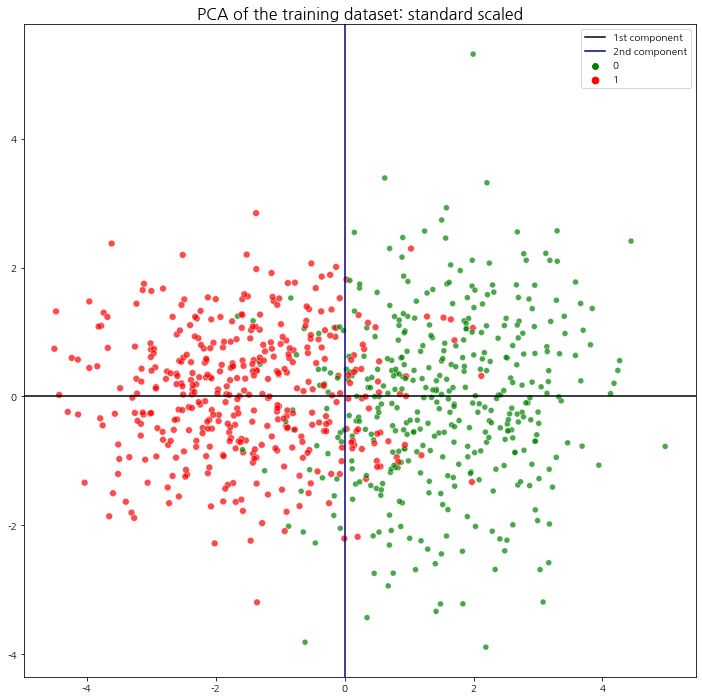

In [157]:
pca = PCA(n_components=2, random_state=42)
xpca = pca.fit_transform(X_train)

fig, ax = plt.subplots(1,1, figsize = (16,12))
ax.set_aspect(1)
ax.axline((.0, .0), (pca.transform(pca.components_)[0,0], pca.transform(pca.components_)[0,1]), c='k', label='1st component')
ax.axline((.0, .0), (pca.transform(pca.components_)[1,0], pca.transform(pca.components_)[1,1]), c='navy', label='2nd component')
sns.scatterplot(x = xpca[:,0], y=xpca[:,1], hue=y_train,  alpha=.7, palette={.0:'green', 1.:'red'}, size = y_train, sizes={.0:35, 1.:45} )
plt.title('PCA of the training dataset: standard scaled', fontsize = 16)
plt.show()

In [158]:
num_linspace = .02
ll = [np.arange(xpca.min(axis=0)[col] -.8 , xpca.max(axis=0)[col] +.8 ,num_linspace) for col in range(xpca.shape[1]) ]

In [159]:
xx, yy, = np.meshgrid(*ll)

In [160]:
cm = plt.cm.RdBu_r

* To predict the meshgrid data, use inverse transform of PCA

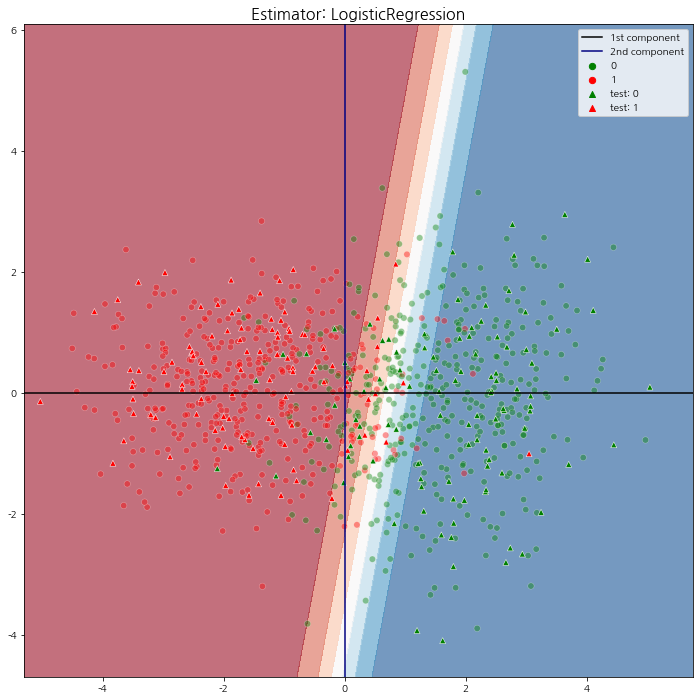

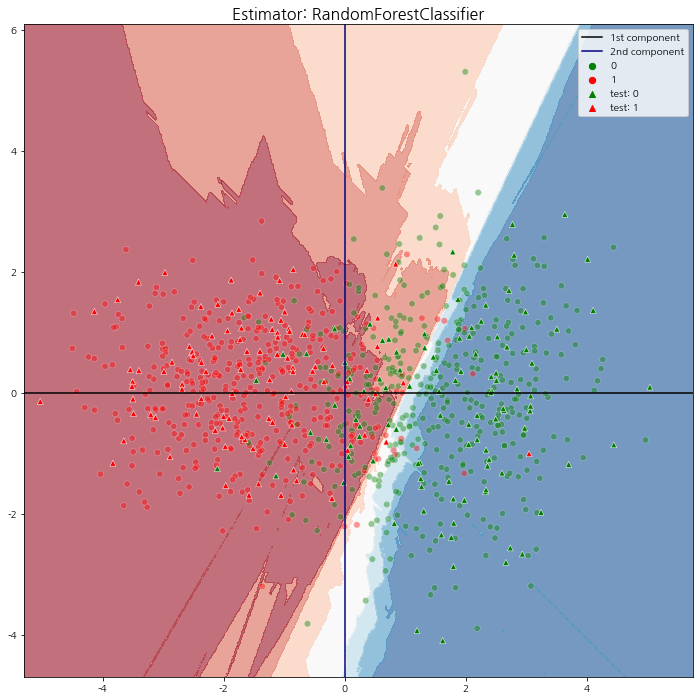

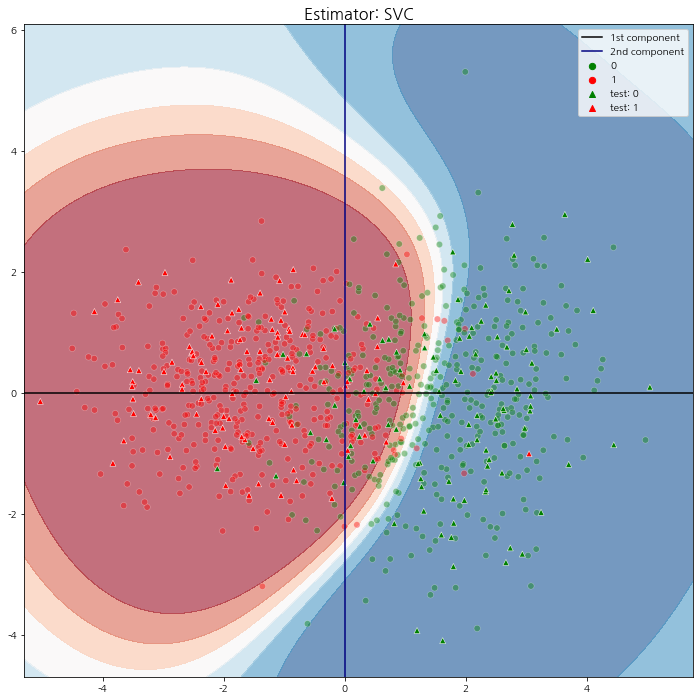

In [161]:
for model in [model_lr, model_rf, model_sv]:
    if X_train.shape[1]<=2:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel(),])[:, 1 ]
    else:
        Z = model.predict_proba(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel(),]))[:, 1 ]

    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(1,1, figsize = (16,12))
    ax.set_aspect(1)

    ax.axline((.0, .0), (pca.transform(pca.components_)[0,0], pca.transform(pca.components_)[0,1]), c='k', label='1st component')
    ax.axline((.0, .0), (pca.transform(pca.components_)[1,0], pca.transform(pca.components_)[1,1]), c='navy', label='2nd component')

    # Plot filled contours
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.6)

    # Plot the training points
    sns.scatterplot(x = xpca[:,0], y=xpca[:,1], hue=y_train, palette={0:'green', 1:'red',}, size=y_train,
                    hue_order = [0, 1], sizes = {0:40, 1:40, }, alpha = .4 )

    # Plot the testing points
    if X_test.shape[1]<=2:
        sns.scatterplot(x = (X_test)[:, 0], y = (X_test)[:, 1], hue = y_test, palette={0:'green', 1:'red'}, style=y_test, markers={0:'*', 1:'v'}, )
    else:
        y_test_str = np.vectorize(lambda x: 'test: 1' if x==1 else 'test: 0')(y_test)
        sns.scatterplot(x = pca.transform((X_test))[:, 0], y = pca.transform((X_test))[:, 1], hue = y_test_str, hue_order = ['test: 0', 'test: 1'],
                         palette={'test: 0':'green', 'test: 1':'red'}, style = y_test_str, markers={'test: 0':'^', 'test: 1':'^'},  alpha=1.  )
    plt.title('Estimator: '+ re.sub(r'\([^()]+\)', '', str(model)), fontsize=16)
    plt.legend()
    plt.show()